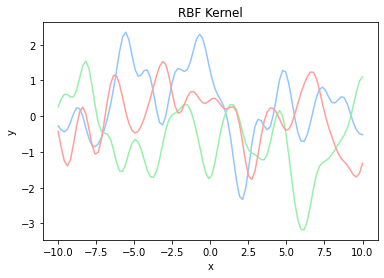

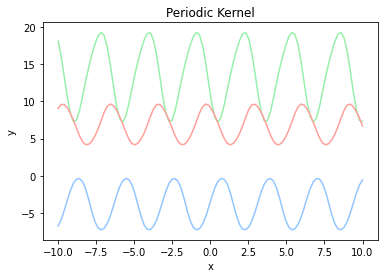

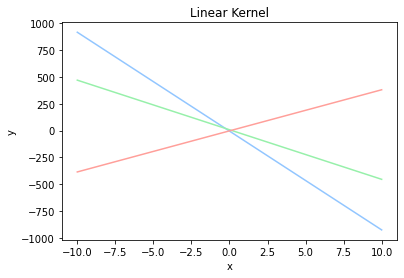

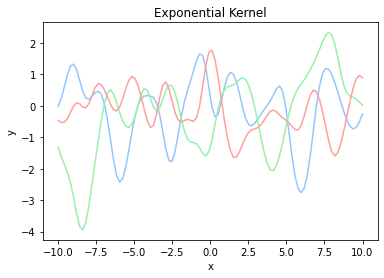

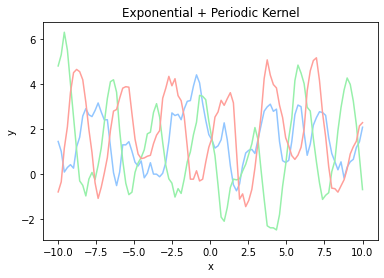

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
import numpy as np
from scipy.stats import norm
from kernels import rbf, periodic, exp, linear

In [6]:
def objective(x):
    return 2 * np.sin(x) + 3 * np.cos(2 * x) + 5 * np.sin(2 / 3 * x)

In [7]:
def train_test_split(x, y, test_size):
    assert len(x) == len(y)
    n_samples = len(x)
    test_indices = np.sort(
        np.random.choice(
            np.arange(n), int(
                n_samples * test_size), replace=False))
    train_indices = np.ones(n_samples, dtype=bool)
    train_indices[test_indices] = False
    test_indices = ~ train_indices

    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]


n = 100
data_x = np.linspace(0, 4 * np.pi, n)
data_y = objective(data_x)


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.70)

In [9]:
def plot_aquisition(x_train, y_train, x_test, mu, var):
    plt.figure(figsize=(16, 8))
    plt.title('Gaussian Process Regressor', fontsize=20)

    plt.plot(data_x, data_y, label='objective')
    plt.plot(
        x_train,
        y_train,
        'o',
        label='train data')

    std = np.sqrt(np.abs(var))

    plt.plot(x_test, mu, label='mean')

    plt.fill_between(
        x_test,
        mu + 2 * std,
        mu - 2 * std,
        alpha=.2,
        label='standard deviation')
    plt.legend(
        loc='lower left',
        fontsize=12)
    plt.savefig('acquisition.png')

In [114]:
def gpr(x_train, y_train, x_test, kernel):
    # average
    mu = []
    # variance
    var = []

    train_length = len(x_train)
    test_length = len(x_test)

    K = np.zeros((train_length, train_length))
    for x_idx in range(train_length):
        for x_prime_idx in range(train_length):
            K[x_idx, x_prime_idx] = kernel(x_train[x_idx], x_train[x_prime_idx])

    yy = np.dot(np.linalg.inv(K), y_train)

    for x_test_idx in range(test_length):
        k = np.zeros((train_length,))
        for x_idx in range(train_length):
            k[x_idx] = kernel(
                x_train[x_idx],
                x_test[x_test_idx])
        s = kernel(
            x_test[x_test_idx],
            x_test[x_test_idx])
        mu.append(np.dot(k, yy))
        kK_ = np.dot(k, np.linalg.inv(K))
        var.append(s - np.dot(kK_, k.T))
    return np.array(mu), np.array(var)

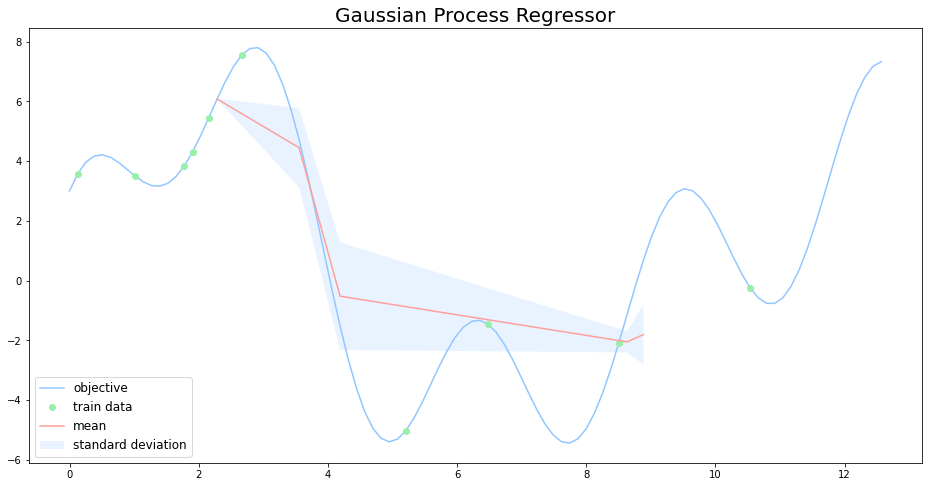

In [115]:
# Radiant Basis Kernel
kernel = lambda x, x_prime : rbf(x, x_prime, theta_1=1.0, theta_2=1.0)
mu, var = gpr(x_train, y_train, x_test, kernel)
plot_aquisition(x_train, y_train, x_test, mu, var)

In [327]:
n = 100
data_x = np.linspace(0, 4 * np.pi, n)
data_y = objective(data_x)


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.95)

In [328]:
# Radiant Basis Kernel
kernel = lambda x, x_prime : rbf(x, x_prime, theta_1=1.0, theta_2=1.0)
mu, var = gpr(x_train, y_train, data_x, kernel)

In [332]:
def UCB(mu, var, trial):
    k = np.sqrt(np.log(trial) / trial)
    return mu + k * var

ucb = UCB(mu, var)

In [342]:
#### PI
def PI(mean,var):
    eps = 1e-7
    y_hat = np.max(mu)
    theta = (mean - y_hat)/(var + eps)
    return np.array([norm.cdf(theta[i]) for  i in range(len(theta))])

pi = PI(mu, var)

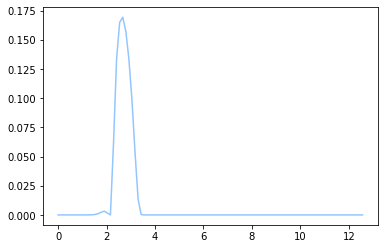

In [347]:
#### EI
def EI(mu,var):
    eps = 1e-7
    sigma = np.sqrt(np.abs(var))
    y_hat = np.max(mu)
    theta = (mu - y_hat)/(sigma + eps)
    return np.array([(mu[i] - y_hat)*norm.cdf(theta[i]) + sigma[i]*norm.pdf(theta[i]) for i in range(len(theta))])

ei = EI(mu, var)
plt.plot(data_x, ei)

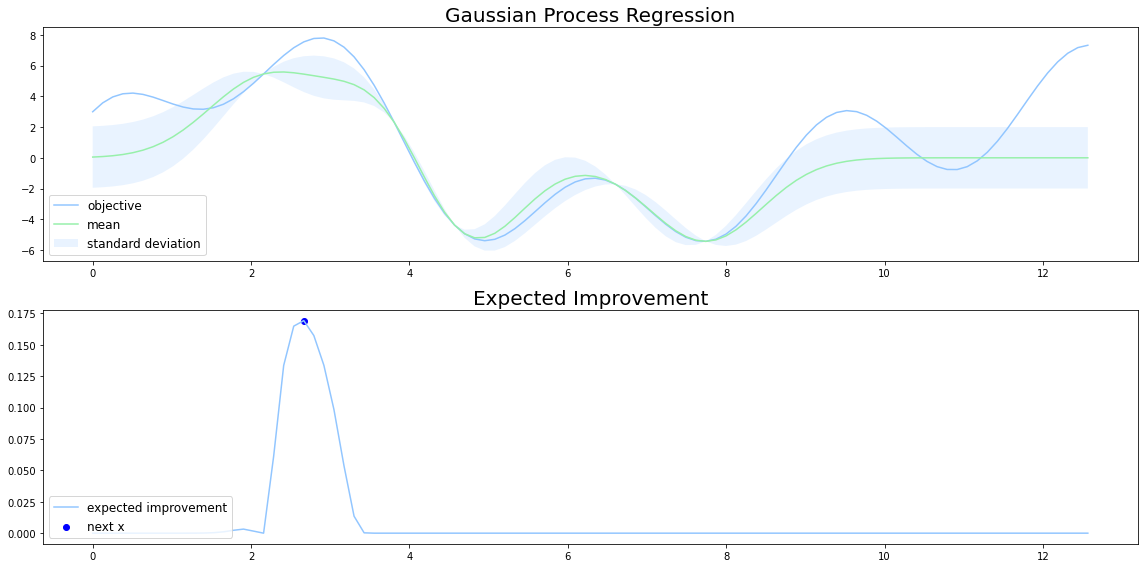

In [348]:
plt.figure(figsize=(16, 8))
plt.subplot(2,1,1)
plt.title('Gaussian Process Regression', fontsize=20)

plt.plot(data_x, data_y, label='objective')
std = np.sqrt(np.abs(var))

plt.plot(data_x, mu, label='mean')

plt.fill_between(
        data_x,
        mu + 2 * std,
        mu - 2 * std,
        alpha=.2,
        label='standard deviation')

plt.legend(
        loc='lower left',
        fontsize=12)

plt.subplot(2,1,2)
plt.title('Expected Improvement', fontsize=20)
plt.plot(
        data_x,
        ei,
        label='expected improvement')
index = np.argmax(ei)
plt.scatter(data_x[index], ei[index], color='blue', label='next x')

plt.legend(
        loc='lower left',
        fontsize=12)
plt.tight_layout()
plt.savefig('acquisition.png')

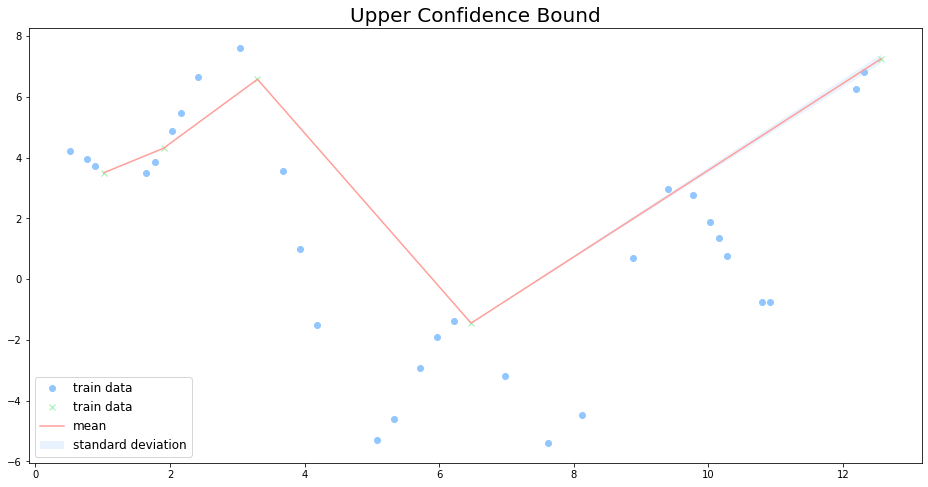

In [67]:
x_array = np.array([])
y_array = np.array([])
x_point = np.random.uniform(-20,20)
epoch=15
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_array:
        x_array = np.append(x_array,x_point)
        print("x_point"+str(x_point))
        y_point = generate_sample(x_point)
        y_array = np.append(y_array,y_point)
        #y_array = np.unique(y_array)
    mean_point = np.array([ pred(x_array,y_array,j)[0] for j in x_ziku])
    variance_point = np.array([ pred(x_array,y_array,j)[1] for j in x_ziku]) 
    qqq = max(y_array)
    accui = aqui3(mean_point,variance_point,qqq) ###change this function
    x_point = x_ziku[maximum(accui)]+np.random.normal(0,0.01,1)
    if(i%1==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x_ziku,np.array(mean_point),label="mean")
        plt.plot(x_ziku,z_ziku)
        high_bound = mean_point+ 1.0*variance_point
        lower_bound = mean_point- 1.0*variance_point
        plt.fill_between(x_ziku,high_bound,lower_bound,label="confidence")
        plt.xlim(-20,20)
        plt.ylim(-100,100)
        plt.scatter(x_array,y_array)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x_ziku,accui)
        plt.savefig("bayes_UCB.png")### change the name
plt.show()
print("finish")
x_point-10